In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import os
import cartopy.crs as ccrs
import scipy.stats

from deepmip_dict import deepmip_dict

repo_dir = '/Users/wb19586/Documents/coding_github/aprp_deepmip'
data_dir = f'{repo_dir}/aprp_output_data/'
cmip_dir = f'{repo_dir}/data/cmip6/'
figure_dir = f'{repo_dir}/figures/'
deepmip_dir = '/Users/wb19586/Documents/data/deepmip_database/deepmip-eocene-p1/'


In [60]:
# get DeepMIP data
deepmip_gmsts = {}
deepmip_ecs = {}
deepmip_fbs = {}

for model in deepmip_dict.keys():
    for i in range(deepmip_dict[model]['ncase']-deepmip_dict[model]['nsens']):

        if deepmip_dict[model]['contr'][i] == 'deepmip-eocene-p1-PI':
            continue
            
        aprp_file = model + '.' + deepmip_dict[model]['contr'][i] +'.to.' + deepmip_dict[model]['sensi'][i] + '.aprp.nc'
        print(aprp_file)
        aprp      = xr.open_dataset(data_dir + '/deepmip/' + aprp_file, decode_times=False)
        aprp = aprp.where(aprp <= 1e6, np.nan)
        aprp_ym   = aprp.mean('time')

        # get area weights
        coslat     = np.cos(np.deg2rad(aprp.lat))

        # calculate GMSTs and ECS
        gmst1     = aprp_ym['tas1'].weighted(coslat).mean(('lat','lon')) - 273.15
        gmst2     = aprp_ym['tas2'].weighted(coslat).mean(('lat','lon')) - 273.15
        dT        = (gmst2 - gmst1).values

        # get CO2 levels from experiment name
        if ( deepmip_dict[model]['contr'][i] != "deepmip-eocene-p1-x1.5" ):
            co2_low  = int(deepmip_dict[model]['contr'][i][-1]) * 280
        else:
            co2_low  = 1.5 * 280
        co2_high = int(deepmip_dict[model]['sensi'][i][-1]) * 280

        # ECS = dT x (ln(2)/ln(c2/c1))
        ecs = dT * ( math.log(2) / math.log( co2_high / co2_low ) )

        # global mean cloud feedback
        cld_feedback_gm = aprp_ym['cld'].weighted(coslat).mean(('lat','lon')) / dT
        # cld_feedback_gm = aprp_ym['lw_net_toa'].weighted(coslat).mean(('lat','lon')) / dT
        # cld_feedback_gm = aprp_ym['lw_cre'].weighted(coslat).mean(('lat','lon')) / dT

        deepmip_gmsts[f"{model}_{deepmip_dict[model]['contr'][i]}"] = gmst1
        deepmip_ecs[f"{model}_{deepmip_dict[model]['contr'][i]}"] = ecs
        deepmip_fbs[f"{model}_{deepmip_dict[model]['contr'][i]}"] = cld_feedback_gm


CESM1.2-CAM5.deepmip-eocene-p1-x1.to.deepmip-eocene-p1-x3.aprp.nc
CESM1.2-CAM5.deepmip-eocene-p1-x3.to.deepmip-eocene-p1-x6.aprp.nc
CESM1.2-CAM5.deepmip-eocene-p1-x6.to.deepmip-eocene-p1-x9.aprp.nc
COSMOS-landveg-r2413.deepmip-eocene-p1-x1.to.deepmip-eocene-p1-x3.aprp.nc
COSMOS-landveg-r2413.deepmip-eocene-p1-x3.to.deepmip-eocene-p1-x4.aprp.nc
GFDL-CM2.1.deepmip-eocene-p1-x1.to.deepmip-eocene-p1-x2.aprp.nc
GFDL-CM2.1.deepmip-eocene-p1-x2.to.deepmip-eocene-p1-x4.aprp.nc
GFDL-CM2.1.deepmip-eocene-p1-x3.to.deepmip-eocene-p1-x6.aprp.nc
GFDL-CM2.1.deepmip-eocene-p1-x4.to.deepmip-eocene-p1-x6.aprp.nc
HadCM3B-M2.1aN.deepmip-eocene-p1-x1.to.deepmip-eocene-p1-x2.aprp.nc
HadCM3B-M2.1aN.deepmip-eocene-p1-x2.to.deepmip-eocene-p1-x3.aprp.nc
IPSLCM5A2.deepmip-eocene-p1-x1.5.to.deepmip-eocene-p1-x3.aprp.nc
MIROC4m.deepmip-eocene-p1-x1.to.deepmip-eocene-p1-x2.aprp.nc
MIROC4m.deepmip-eocene-p1-x2.to.deepmip-eocene-p1-x3.aprp.nc
NorESM1-F.deepmip-eocene-p1-x2.to.deepmip-eocene-p1-x4.aprp.nc


/Users/wb19586/opt/anaconda3/envs/aprp/lib/python3.9/site-packages/xarray/coding/times.py:167: SerializationWarning: Ambiguous reference date string: 950-01-01. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0950-01-01). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/Users/wb19586/opt/anaconda3/envs/aprp/lib/python3.9/site-packages/xarray/coding/times.py:167: SerializationWarning: Ambiguous reference date string: 950-01-01. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0950-01-01). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/Users/wb19586/opt/anaconda3/envs/aprp/lib/python3.9/site-packages/xarray/coding/times

              Model   ECS  GMST1  GMST2   cld  cld\_c  cld\_ga  cld\_mu   clr  \
0        ACCESS-CM2  4.71  13.94  19.64  1.10    0.85     0.29    -0.05  0.36   
1     ACCESS-ESM1-5  3.85  14.49  19.13  0.55    0.39     0.25    -0.09  0.39   
2     AWI-CM-1-1-MR  3.13  13.77  18.65 -0.21    0.20    -0.34    -0.07  0.35   
3       BCC-CSM2-MR  2.96  14.55  18.67  0.09   -0.00     0.18    -0.09  0.31   
4          BCC-ESM1  3.24  14.92  19.29  0.31    0.10     0.33    -0.12  0.28   
5        CAS-ESM2-0  3.46  14.08  19.01  0.20    0.19     0.11    -0.10  0.33   
6       CESM2-WACCM  4.71  13.91  19.35  0.85    0.48     0.48    -0.10  0.15   
7             CIESM  5.67  14.08  20.92  0.00    0.00     0.00     0.00  0.31   
8         CMCC-ESM2  3.55  13.70  18.86  0.39    0.41     0.05    -0.06  0.30   
9     CNRM-CM6-1-HR  4.40  12.61  18.32  0.06    0.10     0.00    -0.05  0.46   
10          CanESM5  5.63  13.42  20.33  0.18    0.27    -0.01    -0.08  0.41   
11        CanESM5-1  5.62  1

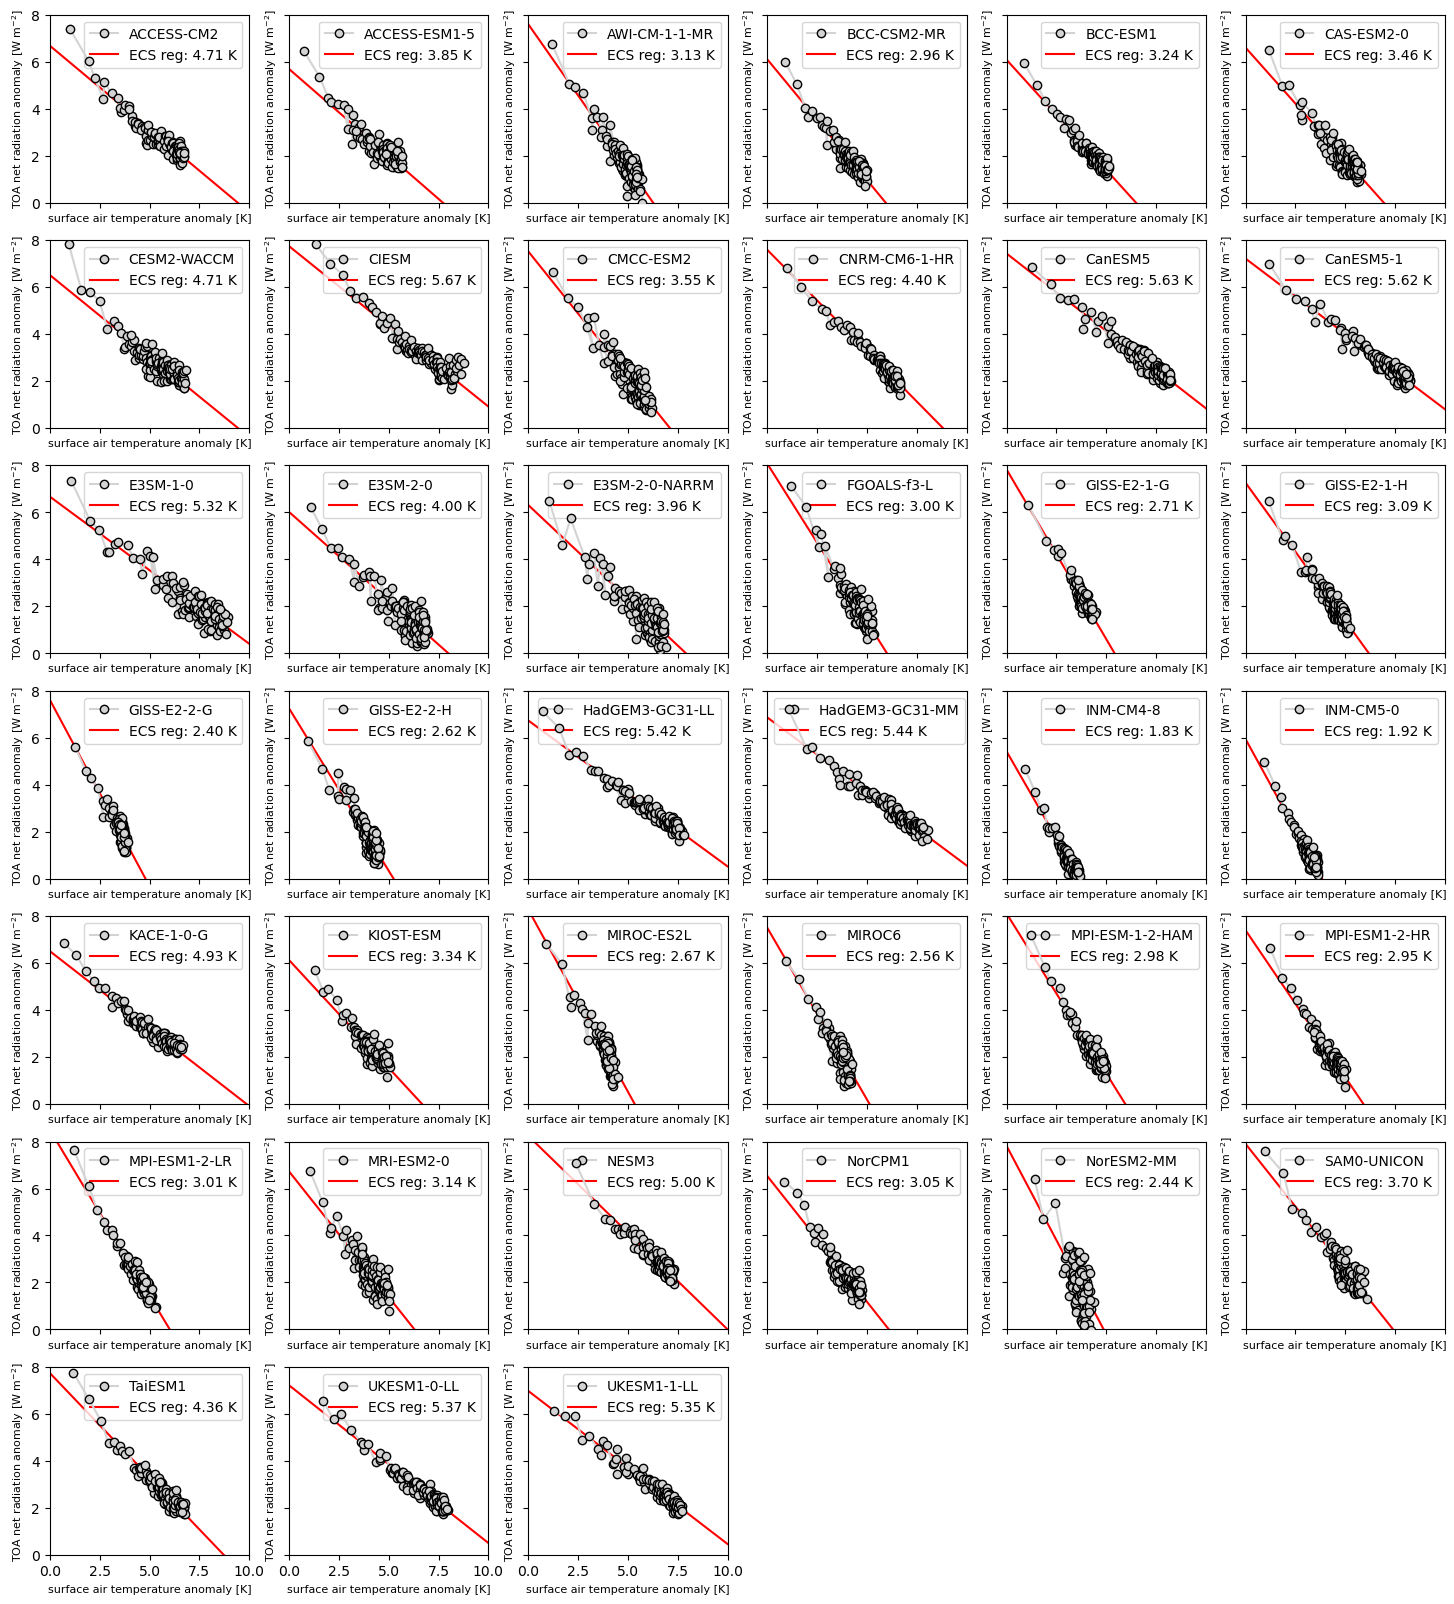

In [6]:
# get CMIP6 data
cmip_gmsts = []
cmip_fbs = []
cmip_ecs = []

# Gregory plots
num_cols = 6
plot_idx = 0
row_idx = 0
col_idx = 0
fig, axs = plt.subplots(7, 6, figsize=(18, 20), sharex=True, sharey=True)

# Sort the list of model directories
sorted_models = sorted(os.listdir(cmip_dir + "piControl/"))

# DataFrame to store results for CSV export
results = []
    
for model in sorted_models:

    if model == '.DS_Store' or model == 'IPSL-CM6A-LR' or model == 'CMCC-CM2-SR5' or model == 'FGOALS-g3':
        continue
    
    aprp_file = model + '.piControl.to.abrupt-4xCO2.aprp.nc'
    aprp      = xr.open_dataset(data_dir + '/cmip/' + aprp_file, decode_times=False)
    aprp = aprp.where(aprp <= 1e6, np.nan)
    aprp_ym   = aprp.mean('time')

    # calculate area weights
    coslat     = np.cos(np.deg2rad(aprp.lat))
    
    gmst1     = aprp_ym['tas1'].weighted(coslat).mean(('lat','lon')) - 273.15
    gmst2     = aprp_ym['tas2'].weighted(coslat).mean(('lat','lon')) - 273.15
    dT        = (gmst2 - gmst1).values

    cmip_gmsts.append(gmst1.values)

    # global mean cloud feedback
    feedback_gm = aprp_ym.weighted(coslat).mean(('lat','lon')) / dT
    # cmip_cld[f"cmip_{model}"] = cld_feedback_gm
    cmip_fbs.append(feedback_gm['cld'].values)

    # claclulate ECS via Gregory plots
    # PI reference
    tas_clim = xr.open_dataset(cmip_dir + '/piControl/' + model + "/tas_climatology.nc", decode_times=False)["tas"].squeeze()
    rlut_clim = xr.open_dataset(cmip_dir + '/piControl/' + model + "/rlut_climatology.nc", decode_times=False)["rlut"].squeeze()
    rsut_clim = xr.open_dataset(cmip_dir + '/piControl/' + model + "/rsut_climatology.nc", decode_times=False)["rsut"].squeeze()
    rsdt_clim = xr.open_dataset(cmip_dir + '/piControl/' + model + "/rsdt_climatology.nc", decode_times=False)["rsdt"].squeeze()

    toa_clim = rsdt_clim - rsut_clim - rlut_clim
    
    coslat = np.cos(np.deg2rad(tas_clim.lat))
    
    tas_mean = tas_clim.weighted(coslat).mean(('lat','lon','time'))
    toa_mean = toa_clim.weighted(coslat).mean(('lat','lon','time'))

    tas_gm_ts = xr.open_dataset(cmip_dir + '/abrupt-4xCO2/' + model + "/tas_gm.ts.nc", decode_times=False)["tas"].squeeze()
    toa_gm_ts = xr.open_dataset(cmip_dir + '/abrupt-4xCO2/' + model + "/toa-balance_gm.ts.nc", decode_times=False)["rsdt"].squeeze()

    tas_anom = tas_gm_ts - tas_mean
    toa_anom = toa_gm_ts - toa_mean

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(tas_anom, toa_anom)

    # Calculate ECS and store it
    ecs = -intercept / slope / 2.0 if slope != 0 else np.nan
    # cmip_ecs[f"cmip_{model}"] = ecs
    cmip_ecs.append(ecs)

    # Plotting the regression line
    # Create a range of x-values from 0 to 10
    x_values = np.linspace(0, 10, 100)

    # Create a legend label with the model name and ECS value
    axs[row_idx,col_idx].plot(tas_anom, toa_anom, marker="o", markersize=6, markeredgecolor='k', color='lightgray', label=model,zorder=100)
    legend_label = f"ECS reg: {ecs:.2f} K"
    axs[row_idx, col_idx].plot(x_values, intercept + slope * x_values, 'r', label=legend_label)

    axs[row_idx,col_idx].legend()
    axs[row_idx,col_idx].set_xlim([0, 10])
    axs[row_idx,col_idx].set_ylim([0, 8])
    axs[row_idx,col_idx].set_xlabel('surface air temperature anomaly [K]', fontsize=8)
    axs[row_idx,col_idx].set_ylabel('TOA net radiation anomaly [W m$^{-2}$]', fontsize=8)

    # append to results list as dictionary for CSV export
    results.append({
        'Model': model,
        'ECS': float(ecs),
        'GMST1': float(gmst1.values),
        'GMST2': float(gmst2.values),
        'cld': float(feedback_gm['cld'].values),
        'cld\_c': float(feedback_gm['cld_c'].values),
        'cld\_ga': float(feedback_gm['cld_ga'].values),
        'cld\_mu': float(feedback_gm['cld_mu'].values),
        'clr': float(feedback_gm['clr'].values),
        'clr\_ga': float(feedback_gm['clr_ga'].values),
        'clr\_mu': float(feedback_gm['clr_mu'].values),
        'alf': float(feedback_gm['alf'].values),
        'alf\_clr': float(feedback_gm['alf_clr'].values),
        'alf\_oc': float(feedback_gm['alf_oc'].values)
    })

    
    col_idx += 1

    if col_idx == num_cols:
        row_idx += 1
        col_idx = 0
        
# remove unused plots
total_plots_required = len(cmip_gmsts)
for i in range(7):
    for j in range(6):
        if i * 6 + j >= total_plots_required:
            axs[i, j].remove()

fig.savefig(figure_dir + '/supp_cmip_ecs_gregory.pdf', bbox_inches='tight')

# Convert results to DataFrame and write to CSV
df = pd.DataFrame(results).round(2)
csv_file_path = f'{repo_dir}/data/csv/cmip_results_for_table.csv'
df.to_csv(csv_file_path, index=False)

print(df)



In [7]:
# Generate LaTeX table
latex_table_path = f'{repo_dir}/data/csv/cmip6_ecs_aprp_results_table.tex'
df.to_latex(latex_table_path, index=False, float_format="%.2f")

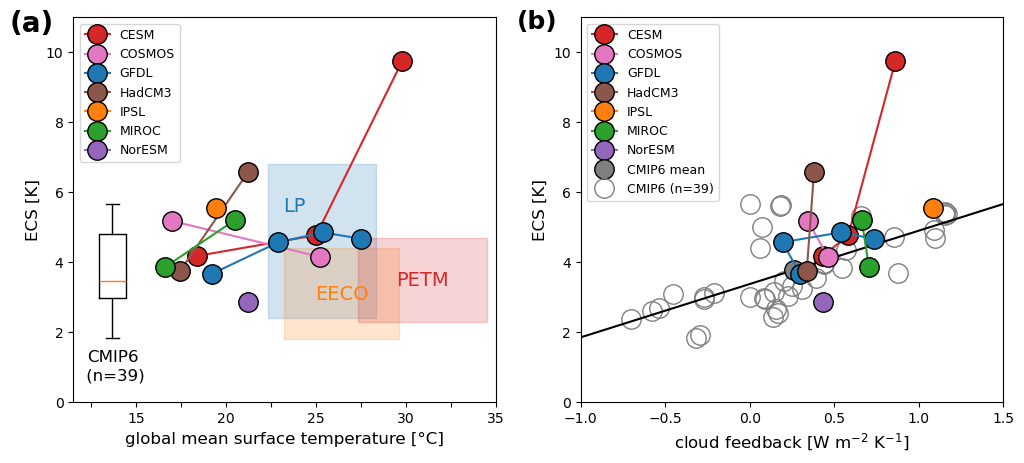

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for model in deepmip_dict.keys():
    model_gmsts = []
    for key, data_array in deepmip_gmsts.items():
        if key.startswith(model):
            model_gmsts.append(data_array.item())
    model_ecs = []
    for key, data_array in deepmip_ecs.items():
        if key.startswith(model):
            model_ecs.append(data_array.item())  
    model_cld = []
    for key, data_array in deepmip_fbs.items():
        if key.startswith(model):
            model_cld.append(data_array.item())

    axs[0].plot(model_gmsts, model_ecs, marker="o", markersize=14, markeredgecolor='k', color=deepmip_dict[model]['pcolor'], label=deepmip_dict[model]['group'],zorder=100)
    axs[1].plot(model_cld, model_ecs, marker="o", markersize=14, markeredgecolor='k', color=deepmip_dict[model]['pcolor'], label=deepmip_dict[model]['group'],zorder=100)
    
axs[0].boxplot(cmip_ecs, positions=[np.mean(cmip_gmsts)], widths=1.5)
axs[0].set_xlim([11.5, 35.0])
axs[0].set_xticks([12.5,15,17.5,20,22.5,25,27.5,30,32.5,35], ["","15","","20","","25","","30","","35"])
axs[0].set_ylim([0, 11])

axs[1].plot(np.mean(cmip_fbs), np.mean(cmip_ecs), marker="o", markersize=14, markeredgecolor='black', color='gray', linestyle='none',zorder=2, label=f"CMIP6 mean")
axs[1].plot(cmip_fbs, cmip_ecs, marker="o", markersize=14, markeredgecolor='gray', color='none', linestyle='none',zorder=1, label=f"CMIP6 (n={len(cmip_gmsts)})")
axs[1].set_xlim([-1.0, 1.5])
axs[1].set_ylim([0, 11])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(cmip_fbs, cmip_ecs)

# Plotting the regression line
# Create a range of x-values from 0 to 10
x_values = np.linspace(-2, 2, 100)
# legend_label = f"ECS = {ecs:.2f}K"
axs[1].plot(x_values, intercept + slope * x_values, 'k',zorder=1)

# add GMST and ECS EECO estimates from Inglis et al. (2021)
# 90% CIs
# lp_gmst_min = 21.3
# lp_gmst_max = 29.1
# lp_ecs_min = 1.6
# lp_ecs_max = 8.0

# eeco_gmst_min = 22.2
# eeco_gmst_max = 30.7
# eeco_ecs_min = 1.3
# eeco_ecs_max = 5.0

# petm_gmst_min = 25.9
# petm_gmst_max = 35.6
# petm_ecs_min = 1.9
# petm_ecs_max = 5.2

# 66% CIs
lp_gmst_min = 22.3
lp_gmst_max = 28.3
lp_ecs_min = 2.4
lp_ecs_max = 6.8

eeco_gmst_min = 23.2
eeco_gmst_max = 29.6
eeco_ecs_min = 1.8
eeco_ecs_max = 4.4

petm_gmst_min = 27.3
petm_gmst_max = 34.5
petm_ecs_min = 2.3
petm_ecs_max = 4.7

lp_inglis = Rectangle((lp_gmst_min, lp_ecs_min), lp_gmst_max-lp_gmst_min, lp_ecs_max-lp_ecs_min, color='tab:blue', alpha=0.2)
eeco_inglis = Rectangle((eeco_gmst_min, eeco_ecs_min), eeco_gmst_max-eeco_gmst_min, eeco_ecs_max-eeco_ecs_min, color='tab:orange', alpha=0.2)
petm_inglis = Rectangle((petm_gmst_min, petm_ecs_min), petm_gmst_max-petm_gmst_min, petm_ecs_max-petm_ecs_min, color='tab:red', alpha=0.2)

# Add the rectangle to the plot
axs[0].add_patch(lp_inglis)
axs[0].add_patch(eeco_inglis)
axs[0].add_patch(petm_inglis)
# Add text to the center of the rectangle
axs[0].text(lp_gmst_min+(lp_gmst_max-lp_gmst_min)/2-1.5, lp_ecs_min+(lp_ecs_max-lp_ecs_min)/2+1.0, 'LP', ha='center', va='center', fontsize=14, color='tab:blue')
axs[0].text(eeco_gmst_min+(eeco_gmst_max-eeco_gmst_min)/2, eeco_ecs_min+(eeco_ecs_max-eeco_ecs_min)/2, 'EECO', ha='center', va='center', fontsize=14, color='tab:orange')
axs[0].text(petm_gmst_min+(petm_gmst_max-petm_gmst_min)/2, petm_ecs_min+(petm_ecs_max-petm_ecs_min)/2, 'PETM', ha='center', va='center', fontsize=14, color='tab:red')
axs[0].text(np.mean(cmip_gmsts), 1.3, 'CMIP6', ha='center', va='center', fontsize=12)
axs[0].text(np.mean(cmip_gmsts), 0.75, f" (n={len(cmip_gmsts)})", ha='center', va='center', fontsize=12)
# axs[1].axvline(x=0, linestyle='-', color='gray', zorder=0)

axs[0].legend(fontsize=9)
axs[1].legend(fontsize=9)
axs[0].text(-0.15, 1.02, '(a)', transform=axs[0].transAxes, fontsize=20, fontweight='bold', va='top')
axs[1].text(-0.15, 1.02, '(b)', transform=axs[1].transAxes, fontsize=18, fontweight='bold', va='top')
axs[0].set_xlabel('global mean surface temperature [°C]', fontsize=12)
axs[0].set_ylabel('ECS [K]', fontsize=12)
axs[1].set_xlabel('cloud feedback [W m$^{-2}$ K$^{-1}$]', fontsize=12)
axs[1].set_ylabel('ECS [K]', fontsize=12)

# add_panel_labels(ax, fontsize=18, x_offset=-0.1, fontweight='bold')

fig.savefig(figure_dir + '/ecs_scatter.pdf', bbox_inches='tight')   


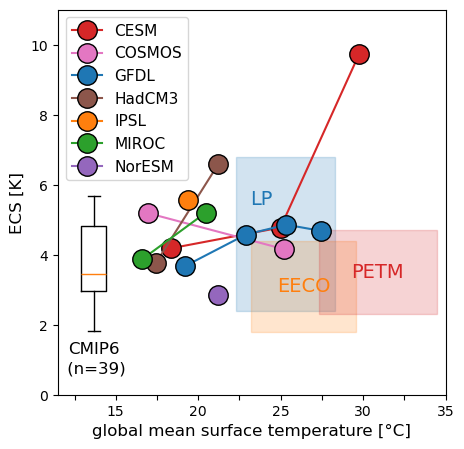

In [68]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

for model in deepmip_dict.keys():
    model_gmsts = []
    for key, data_array in deepmip_gmsts.items():
        if key.startswith(model):
            model_gmsts.append(data_array.item())
    model_ecs = []
    for key, data_array in deepmip_ecs.items():
        if key.startswith(model):
            model_ecs.append(data_array.item())  
    model_cld = []
    for key, data_array in deepmip_fbs.items():
        if key.startswith(model):
            model_cld.append(data_array.item())

    axs.plot(model_gmsts, model_ecs, marker="o", markersize=14, markeredgecolor='k', color=deepmip_dict[model]['pcolor'], label=deepmip_dict[model]['group'],zorder=100)
    
axs.boxplot(cmip_ecs, positions=[np.mean(cmip_gmsts)], widths=1.5)
axs.set_xlim([11.5, 35.0])
axs.set_xticks([12.5,15,17.5,20,22.5,25,27.5,30,32.5,35], ["","15","","20","","25","","30","","35"])
axs.set_ylim([0, 11])

# 66% CIs
lp_gmst_min = 22.3
lp_gmst_max = 28.3
lp_ecs_min = 2.4
lp_ecs_max = 6.8

eeco_gmst_min = 23.2
eeco_gmst_max = 29.6
eeco_ecs_min = 1.8
eeco_ecs_max = 4.4

petm_gmst_min = 27.3
petm_gmst_max = 34.5
petm_ecs_min = 2.3
petm_ecs_max = 4.7

lp_inglis = Rectangle((lp_gmst_min, lp_ecs_min), lp_gmst_max-lp_gmst_min, lp_ecs_max-lp_ecs_min, color='tab:blue', alpha=0.2)
eeco_inglis = Rectangle((eeco_gmst_min, eeco_ecs_min), eeco_gmst_max-eeco_gmst_min, eeco_ecs_max-eeco_ecs_min, color='tab:orange', alpha=0.2)
petm_inglis = Rectangle((petm_gmst_min, petm_ecs_min), petm_gmst_max-petm_gmst_min, petm_ecs_max-petm_ecs_min, color='tab:red', alpha=0.2)

# Add the rectangle to the plot
axs.add_patch(lp_inglis)
axs.add_patch(eeco_inglis)
axs.add_patch(petm_inglis)
# Add text to the center of the rectangle
axs.text(lp_gmst_min+(lp_gmst_max-lp_gmst_min)/2-1.5, lp_ecs_min+(lp_ecs_max-lp_ecs_min)/2+1.0, 'LP', ha='center', va='center', fontsize=14, color='tab:blue')
axs.text(eeco_gmst_min+(eeco_gmst_max-eeco_gmst_min)/2, eeco_ecs_min+(eeco_ecs_max-eeco_ecs_min)/2, 'EECO', ha='center', va='center', fontsize=14, color='tab:orange')
axs.text(petm_gmst_min+(petm_gmst_max-petm_gmst_min)/2, petm_ecs_min+(petm_ecs_max-petm_ecs_min)/2, 'PETM', ha='center', va='center', fontsize=14, color='tab:red')
axs.text(np.mean(cmip_gmsts), 1.3, 'CMIP6', ha='center', va='center', fontsize=12)
axs.text(np.mean(cmip_gmsts), 0.75, f" (n={len(cmip_gmsts)})", ha='center', va='center', fontsize=12)

axs.legend(fontsize=11)
axs.set_xlabel('global mean surface temperature [°C]', fontsize=12)
axs.set_ylabel('ECS [K]', fontsize=12)


fig.savefig(figure_dir + '/ecs_scatter_single.pdf', bbox_inches='tight')   
